In [97]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from keras.preprocessing import image

In [52]:
eyey = tf.keras.models.load_model("eyes_loc/eyesy")
eyex = tf.keras.models.load_model("eyes_loc/eyesx")

In [53]:
def image_from_index(n):
    img = image.load_img(("greyscale/"+str(n).zfill(6)+".jpg"), target_size=(218, 178),color_mode='grayscale')
    return np.asarray(img)

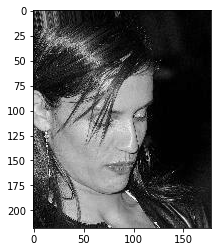

In [76]:
plt.imshow(image_from_index(4), cmap="gray")

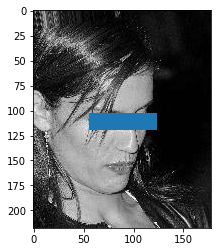

In [229]:
img = image_from_index(4)
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")
img = np.expand_dims(img, axis=0)
result=(eyex.predict(img)[0], eyey.predict(img)[0])
#result = reshaper(result[0], result[1])
plt.scatter(result[0], result[1], color="orange")
result=(eyex.predict(img)[0], eyey.predict(img)[0])
eyes = reshaper(result[0], result[1])
## move left point more left
#eyes[0][0]
## move right point more right
#eyes[1].first += 15
ax.add_patch(patches.Rectangle((eyes[0][0]-15, min(eyes[0][1],eyes[1][1])-7), (eyes[1][0] - eyes[0][0])+30, abs(eyes[1][1] - eyes[0][1])+15))
plt.show()

In [230]:
def reshaper(x,y):
    assert len(x) == len(y)
    ret = []
    for i in range(0, len(x)):
        r = (x[i], y[i])
        ret.append(r)
    return ret

In [310]:
def drawBox(index):
    img = image_from_index(index)
    fig, ax = plt.subplots()
    ax.imshow(img, cmap="gray")
    img = np.expand_dims(img, axis=0)
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    #result = reshaper(result[0], result[1])
    plt.scatter(result[0], result[1], color="orange")
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    eyes = reshaper(result[0], result[1])
    ## move left point more left
    #eyes[0][0]
    ## move right point more right
    #eyes[1].first += 15
    eyeswidth = (eyes[1][0] - eyes[0][0])
    eyesheight = abs(eyes[1][1] - eyes[0][1])
    print(result)
    ax.add_patch(patches.Rectangle((eyes[0][0]-15, min(eyes[0][1],eyes[1][1])-7), eyeswidth+30, eyesheight+15))
    plt.show()

In [311]:
import random

(array([ 70.56854 , 109.643326], dtype=float32), array([111.50054 , 109.688354], dtype=float32))


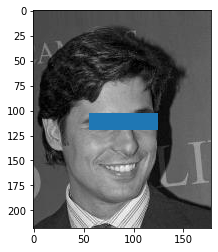

(array([ 68.93715, 109.27541], dtype=float32), array([111.34106 , 110.389275], dtype=float32))


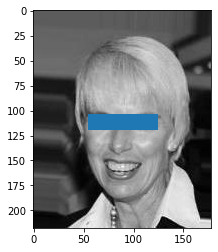

(array([ 70.371605, 109.549   ], dtype=float32), array([111.74312, 110.67798], dtype=float32))


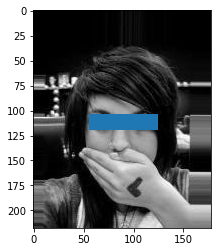

(array([ 70.100685, 107.72301 ], dtype=float32), array([110.55856, 109.2024 ], dtype=float32))


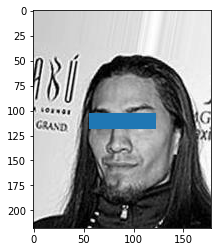

(array([ 71.766365, 109.41378 ], dtype=float32), array([111.5322 , 109.37755], dtype=float32))


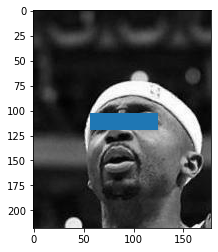

(array([ 69.449394, 108.611   ], dtype=float32), array([110.71274, 110.67112], dtype=float32))


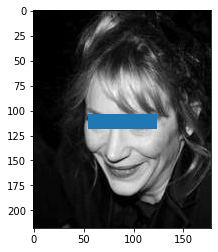

(array([ 69.69965, 108.19588], dtype=float32), array([110.54517, 109.42057], dtype=float32))


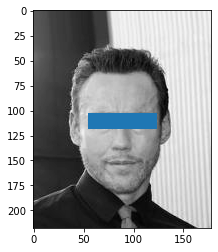

(array([ 70.63722, 108.30884], dtype=float32), array([111.0626 , 108.83821], dtype=float32))


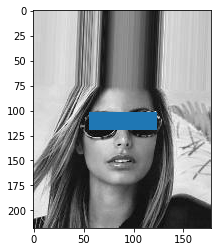

(array([ 69.04058 , 110.364784], dtype=float32), array([111.22941, 110.11259], dtype=float32))


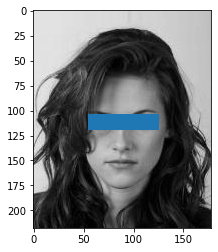

(array([ 69.28417 , 108.665245], dtype=float32), array([111.16254, 109.94538], dtype=float32))


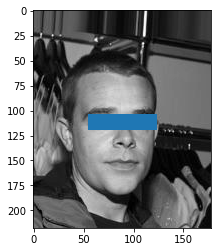

(array([ 68.72902, 109.24989], dtype=float32), array([111.370865, 109.822334], dtype=float32))


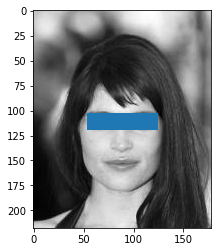

(array([ 68.02043, 110.39576], dtype=float32), array([112.4265 , 109.87406], dtype=float32))


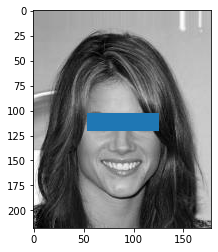

(array([ 68.77455 , 109.381195], dtype=float32), array([112.30697, 109.68805], dtype=float32))


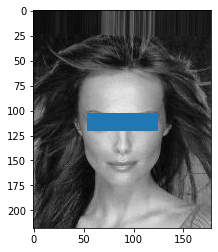

(array([ 70.189926, 109.402145], dtype=float32), array([110.75486, 109.34486], dtype=float32))


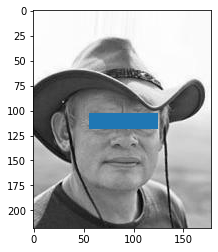

(array([ 68.33489, 108.73379], dtype=float32), array([111.1491 , 109.79043], dtype=float32))


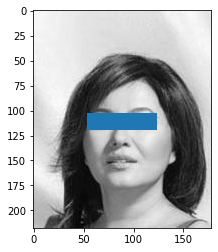

(array([ 69.701485, 107.87595 ], dtype=float32), array([110.754005, 109.674774], dtype=float32))


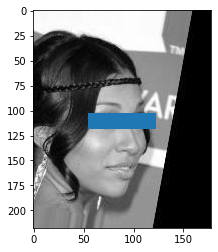

(array([ 70.07005, 110.19613], dtype=float32), array([110.97068, 110.02573], dtype=float32))


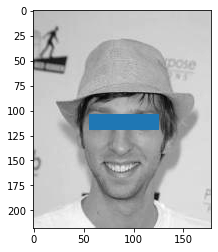

(array([ 69.41749, 108.85076], dtype=float32), array([110.627014, 109.616455], dtype=float32))


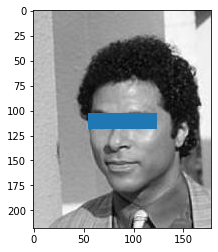

(array([ 70.98674, 108.77104], dtype=float32), array([110.95978 , 109.724144], dtype=float32))


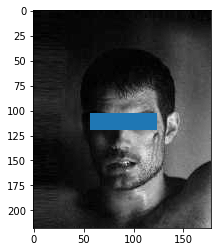

(array([ 69.322296, 106.29358 ], dtype=float32), array([111.13786, 109.88793], dtype=float32))


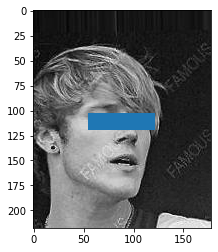

In [312]:
for i in random.choices(range(1, 202599), k=20):
    drawBox(i)
plt.show()

In [202]:
def scale(im, nR, nC):
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                 for c in range(nC)] for r in range(nR)]

In [244]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def sunglasses(index):
    img = image_from_index(index)
    fig, ax = plt.subplots()
    ax.imshow(img, cmap="gray")
    sun = plt.imread("R.png")
    img = np.expand_dims(img, axis=0)
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    #result = reshaper(result[0], result[1])
    plt.scatter(result[0], result[1], color="orange")
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    eyes = reshaper(result[0], result[1])
    ## move left point more left
    #eyes[0][0]
    ## move right point more right
    #eyes[1].first += 15
    sun = scale(sun, int(abs(eyes[1][1] - eyes[0][1]))+15, int(eyes[1][0]-eyes[0][0])+30)
    oi = OffsetImage(sun, zoom = 1)
    box = AnnotationBbox(oi, (eyes[0][0]+(eyes[1][0]-eyes[0][0])*2, eyes[0][1]), frameon=False)
    ax.add_artist(box)
    plt.show()

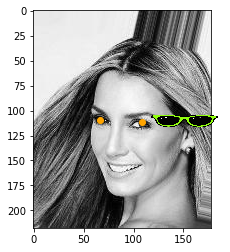

In [245]:
sunglasses(1)

In [259]:
def eyeReplacer(index):
    img = image_from_index(index)
    fig, ax = plt.subplots()
    ax.imshow(img, cmap="gray")
    eyeyeyeye = plt.imread("eyeyeyeye.png")
    img = np.expand_dims(img, axis=0)
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    #result = reshaper(result[0], result[1])
    plt.scatter(result[0], result[1], color="orange")
    result=(eyex.predict(img)[0], eyey.predict(img)[0])
    eyes = reshaper(result[0], result[1])
    ## move left point more left
    #eyes[0][0]
    ## move right point more right
    #eyes[1].first += 15
    oi = OffsetImage(eyeyeyeye, zoom = .02)
    for i in eyes:
        box = AnnotationBbox(oi, i, frameon=False)
        ax.add_artist(box)
    plt.show()

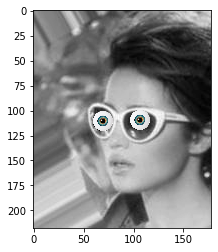

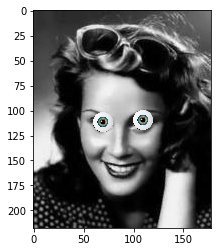

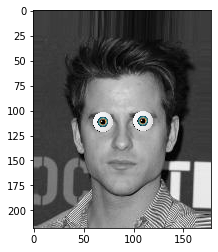

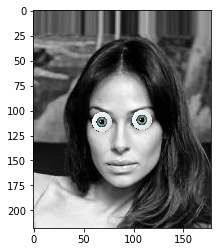

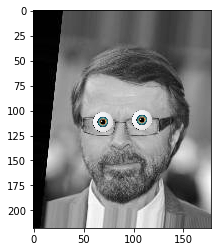

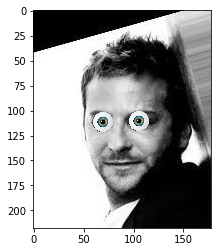

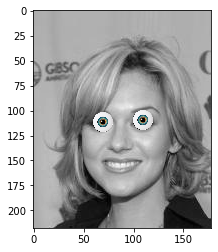

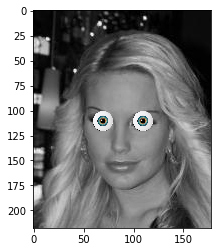

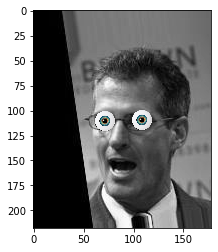

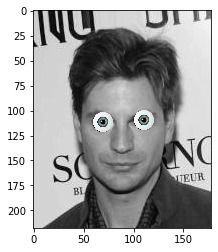

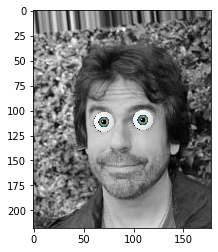

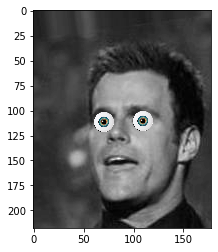

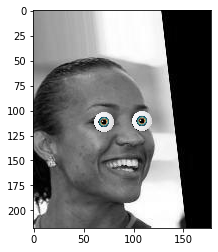

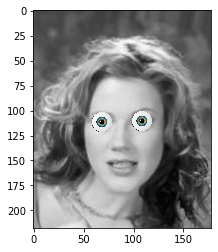

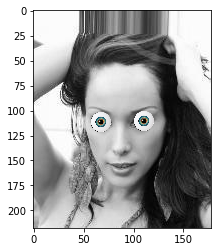

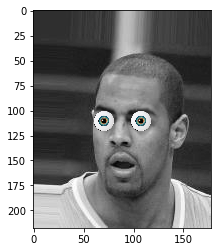

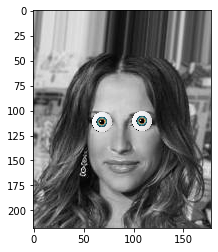

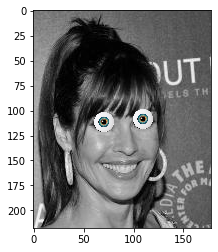

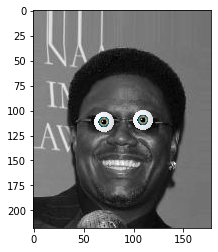

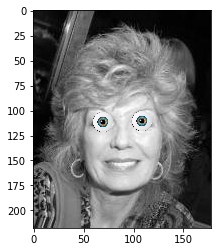

In [261]:
for i in random.choices(range(1, 202599), k=20):
    eyeReplacer(i)
plt.show()

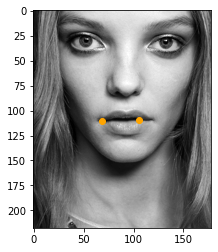

In [313]:
img = np.asarray(Image.open("eyes high.jpg").resize((178, 218)).convert('LA'))[:,:,0:1]
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")
img = np.expand_dims(img, axis=0)
result=(eyex.predict(img)[0], eyey.predict(img)[0])
plt.scatter(result[0], result[1], color="orange")
result=(eyex.predict(img)[0], eyey.predict(img)[0])
eyes = reshaper(result[0], result[1])
eyeswidth = (eyes[1][0] - eyes[0][0])
eyesheight = abs(eyes[1][1] - eyes[0][1])
#ax.add_patch(patches.Rectangle((eyes[0][0]-15, min(eyes[0][1],eyes[1][1])-7), eyeswidth+30, eyesheight+15))
plt.show()